In [13]:
import numpy as np
from numpy import load

#load in data from npz file
data = load('trace.npz')
lst = data.files
data = data[lst[0]]
print(data[0][0:50])



[ -3.6173927    1.01722618  -8.45614616 -12.94618122  -2.5376033
 -10.21308795  -2.1164029   -6.41068832 -13.06173126 -15.36782352
  -8.42268363  -9.44304458 -13.26373474 -12.99843589 -12.73766986
  -6.90744201  -8.3216962   -5.07345096 -12.70039455  -3.04270283
 -11.40477744 -12.86641494 -11.6526622  -10.83394996 -12.28914634
 -18.23499385  -3.72921721  -8.91658584   4.66164073  -1.96396343
 -12.05716888  -0.62231831  -3.31956712  -4.05931274   0.25528535
  -1.57096831 -10.90774146  -8.39844505  -3.8065137   -9.34556285
  -8.79171554  -0.74276272  -4.65752927 -14.44724552 -11.2658271
  -2.60838071  -1.93565992  -5.22414104  -1.10614894   1.07606062]


In [14]:
def getPeaks(array):
    #identify the peaks by all points that are a local maximum and at least 3 standard deviations outside the mean
    #returns a list of length 2 with the first entry being the indexes where peaks are found, and the second being the values
    #at those indexes
    mean= np.mean(array)
    std= np.std(array)
    peaks_idx = []
    peaks_value = []
    for i in range(len(array)-2):
        if (array[i] >= (mean + 3*std)):
            window = [array[i-2], array[i-1], array[i], array[i+1], array[i+2]]
            if (array[i] == max(window)):
                peaks_idx.append(i)
                peaks_value.append(array[i])
    return [peaks_idx, peaks_value]
peaks = getPeaks(data[0])
peaks[0]

[467,
 477,
 521,
 577,
 2121,
 2686,
 2733,
 3110,
 3130,
 3161,
 3176,
 3198,
 3217,
 3234,
 3249,
 3367,
 3491,
 3539,
 3579,
 3677,
 3730,
 3773,
 3797,
 3800,
 3818,
 3833,
 3849,
 3877,
 3915,
 3945,
 4003,
 4107,
 4193,
 4289,
 4343,
 4371,
 4401,
 4454,
 4505,
 4540,
 4618,
 4751,
 4786,
 4814,
 4858,
 4892,
 4917,
 5018,
 5059,
 5081,
 5095,
 5117,
 5129,
 5336,
 5339,
 5346,
 5353,
 5372,
 5398,
 5456,
 5490,
 5511,
 5520,
 5528,
 5557,
 5652,
 5748,
 5778,
 5814,
 5824,
 5873,
 6047,
 6058,
 6086,
 6220,
 6261,
 6297,
 6355,
 6404,
 6614,
 6633,
 6653,
 6688,
 6695,
 6744,
 6762,
 6797,
 6853,
 6975,
 7032,
 7061,
 7100,
 7823,
 7985,
 8292,
 14175,
 15566,
 18150,
 18173,
 18217,
 18804,
 18916,
 18957,
 18989,
 19065,
 19312,
 19499,
 19559,
 19638,
 19679,
 19716,
 19824,
 19868,
 19923,
 19960]

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [32,18] #increases the size of the plot to more easily see the data
#Make five different plots for each neuron

In [16]:
#Method to plot the Peaks
def plotPeaks(array):
    #Plot line
    plt.plot(range(len(array)),array, color = 'gray')
    #Plot peaks
    peaks = getPeaks(array)
    peaks_idx = peaks[0]
    peaks_value = peaks[1]
    plt.plot(peaks_idx,peaks_value, 'bo')
    plt.show()

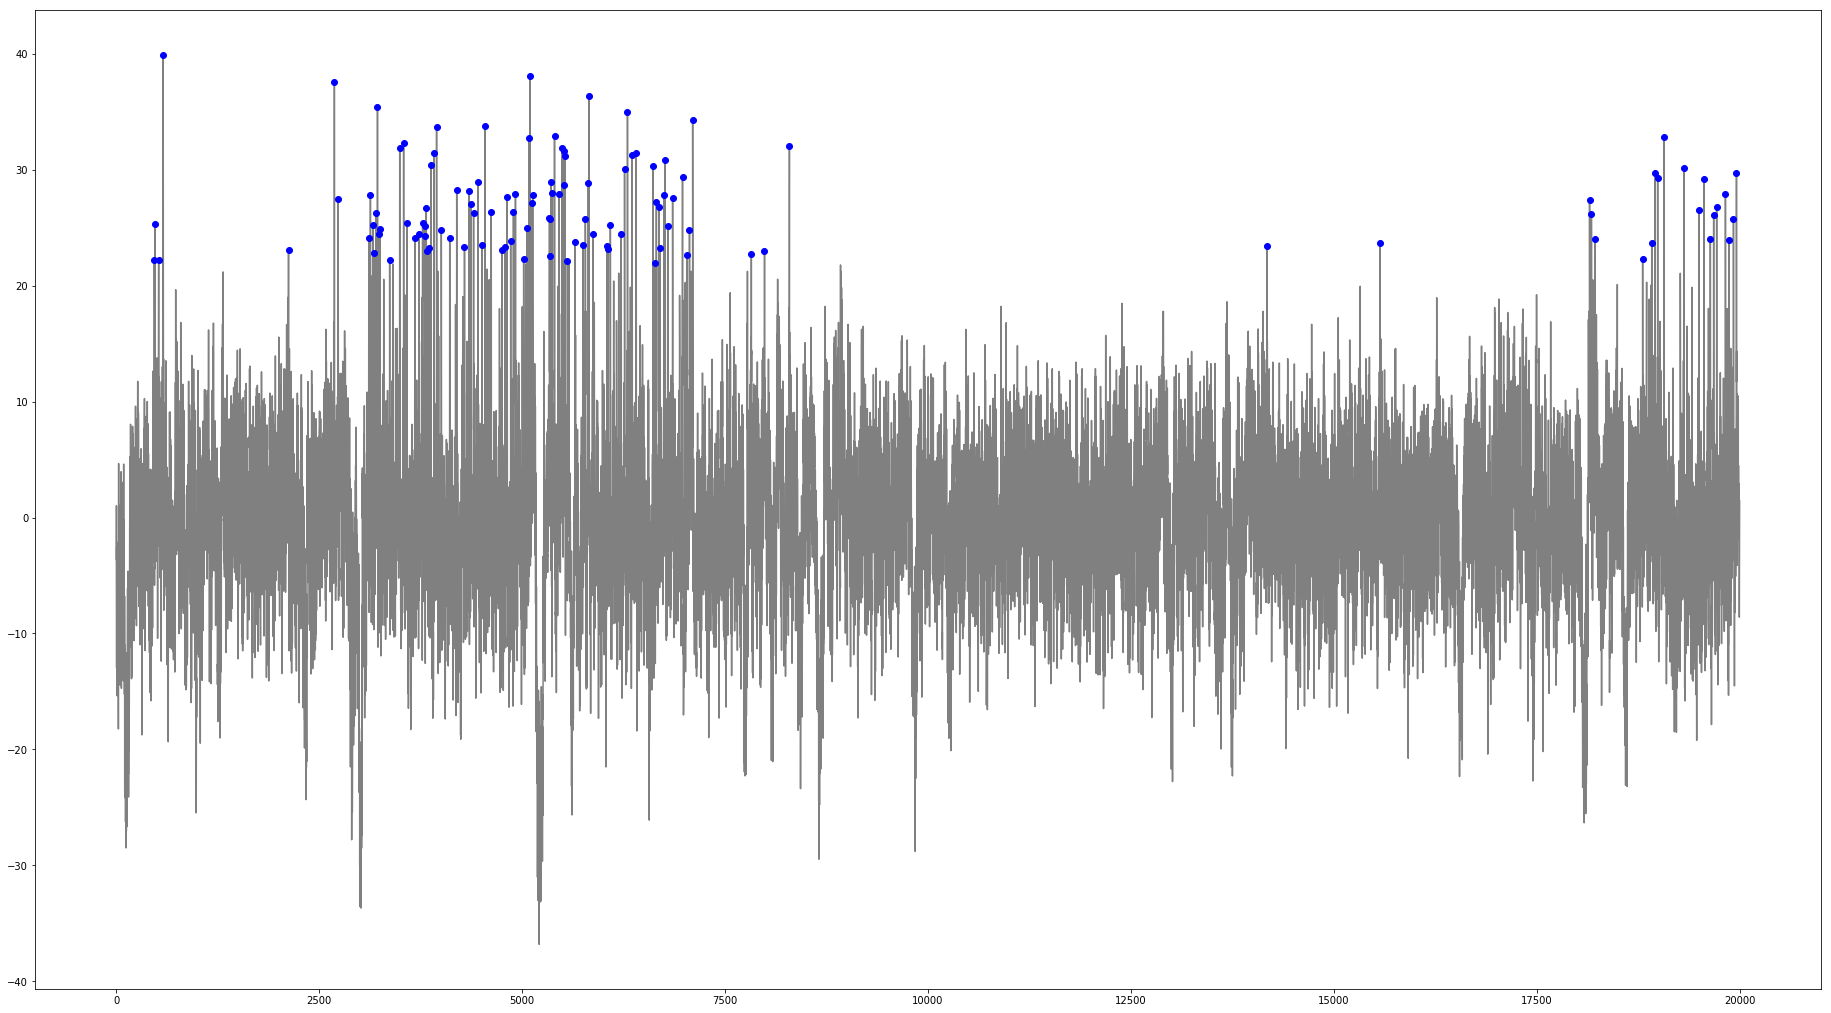

In [17]:
#Plot 1
plotPeaks(data[0])

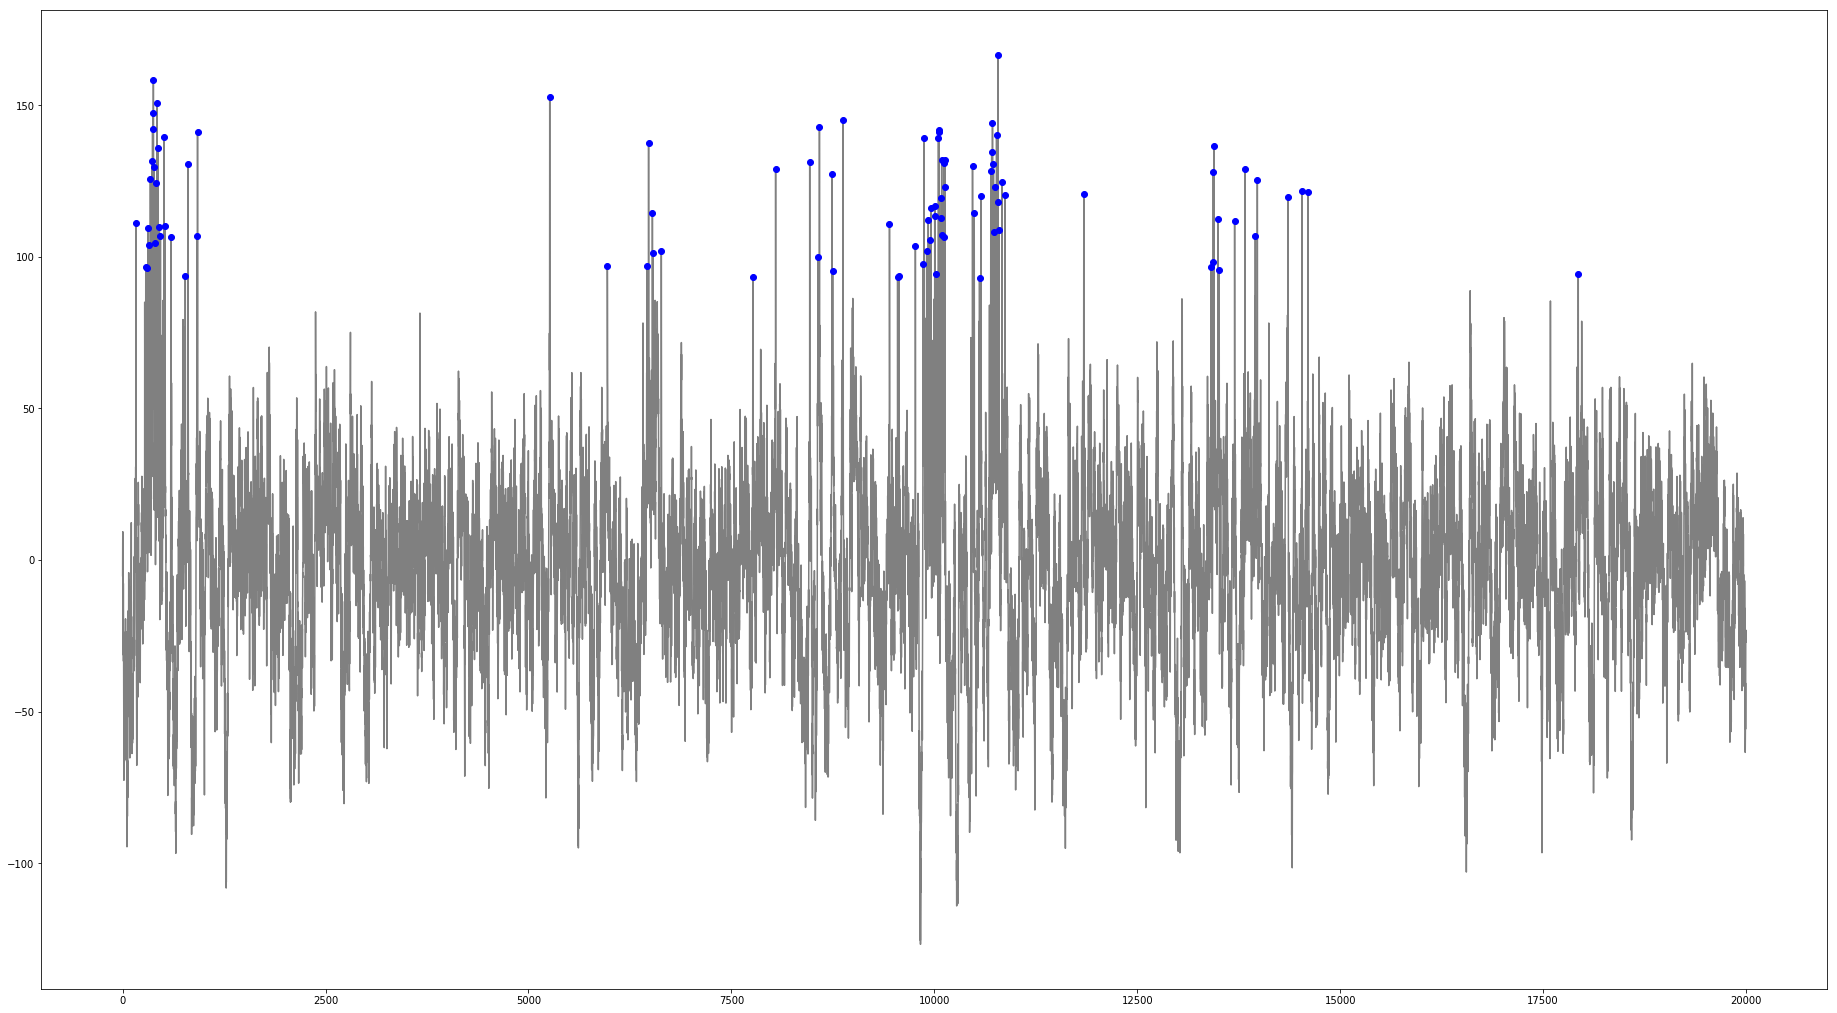

In [18]:
#Plot 2
plotPeaks(data[1])

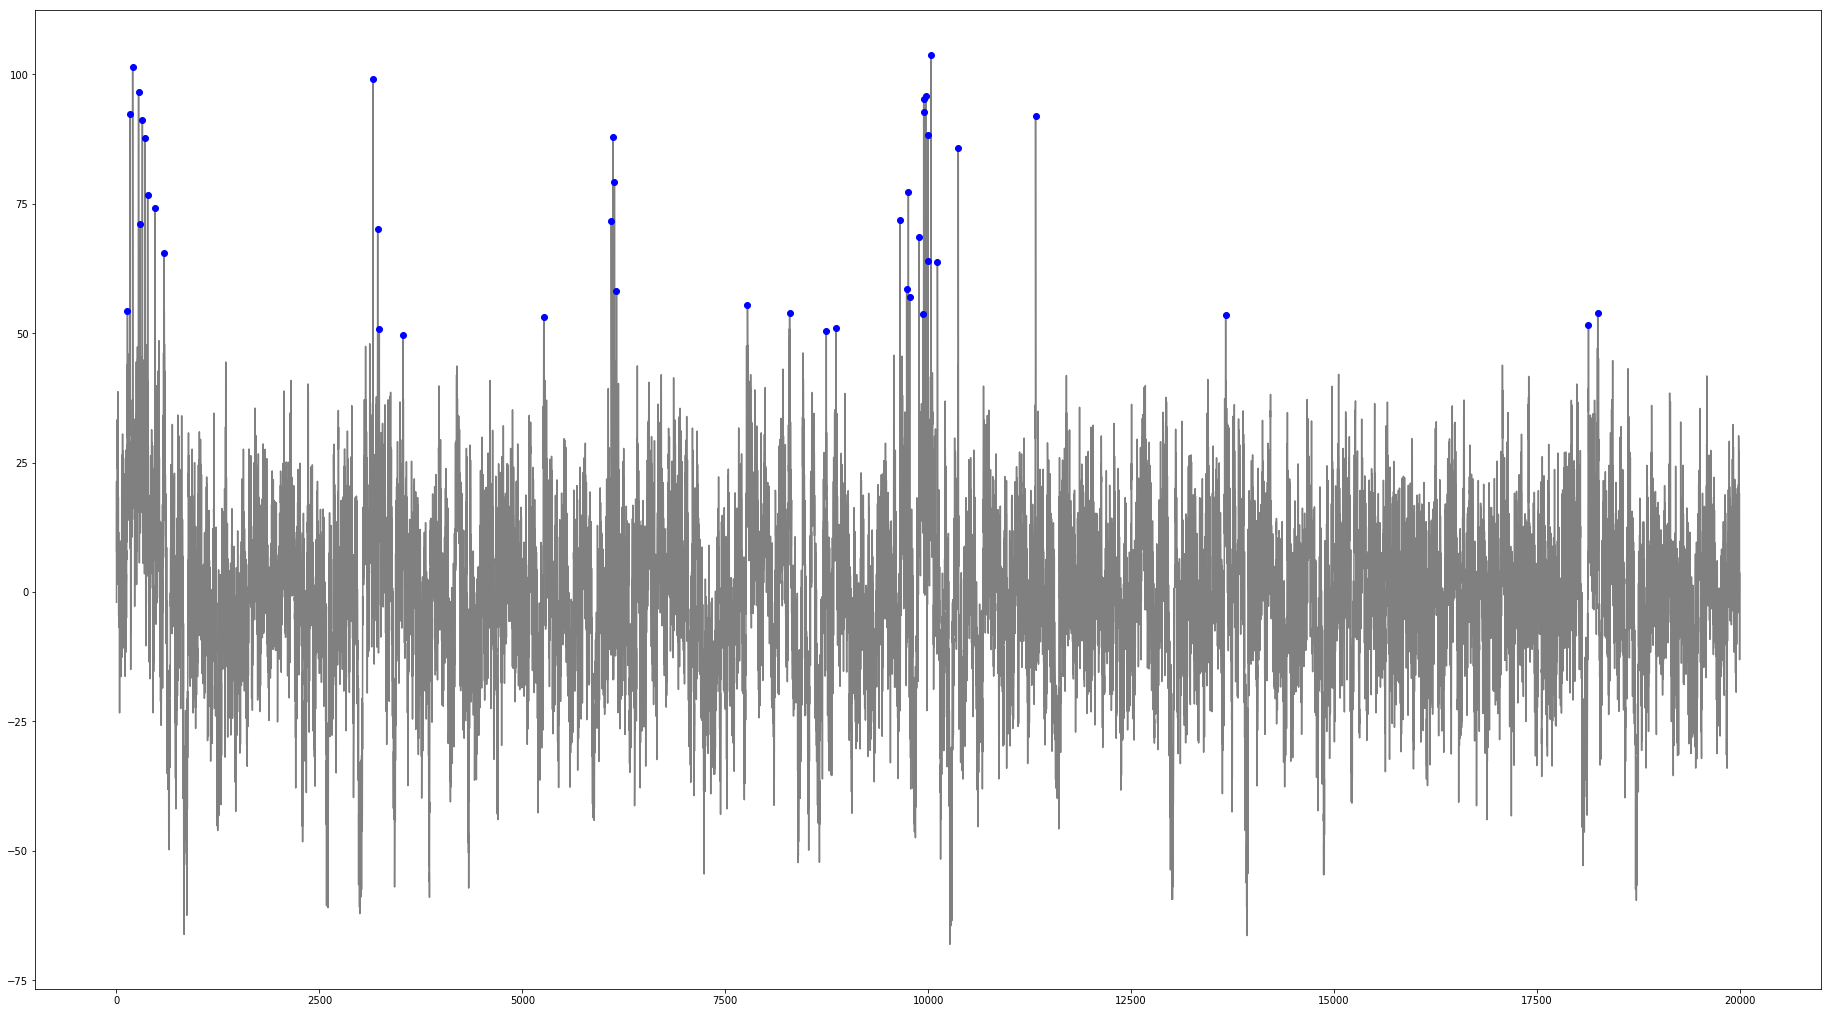

In [19]:
#Plot 3
plotPeaks(data[2])

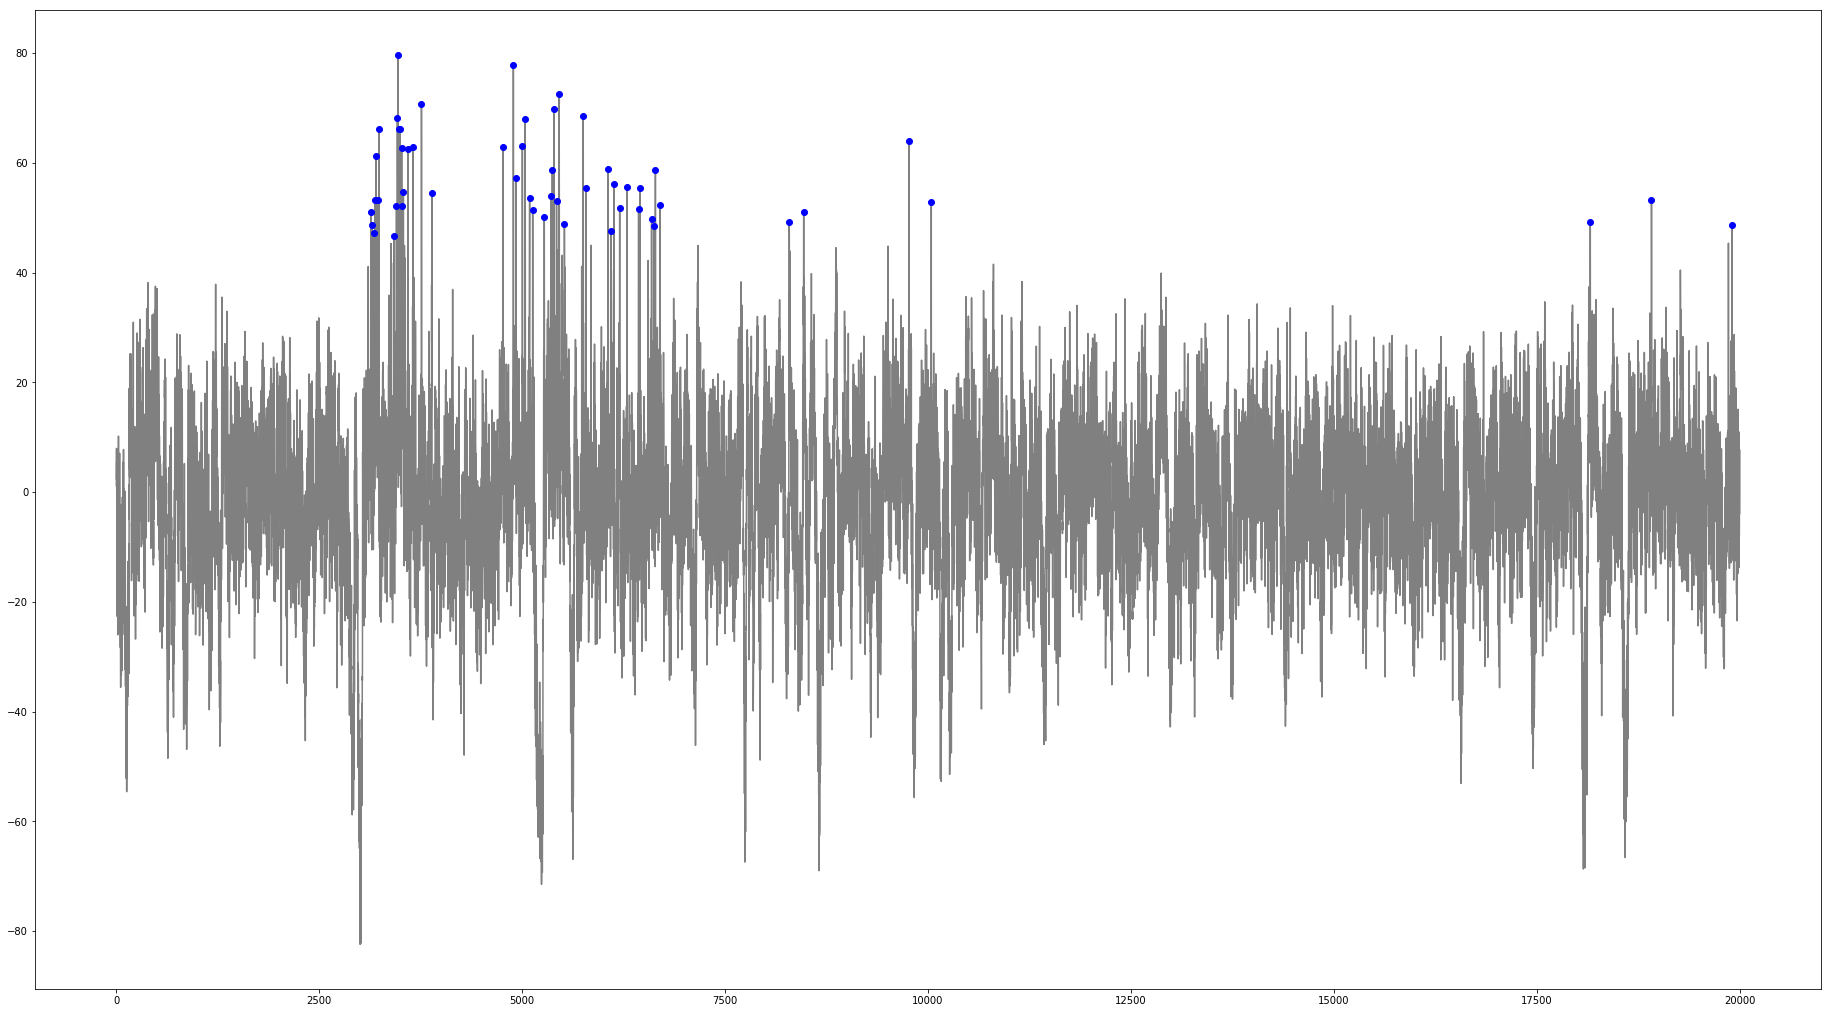

In [20]:
#Plot 4
plotPeaks(data[3])

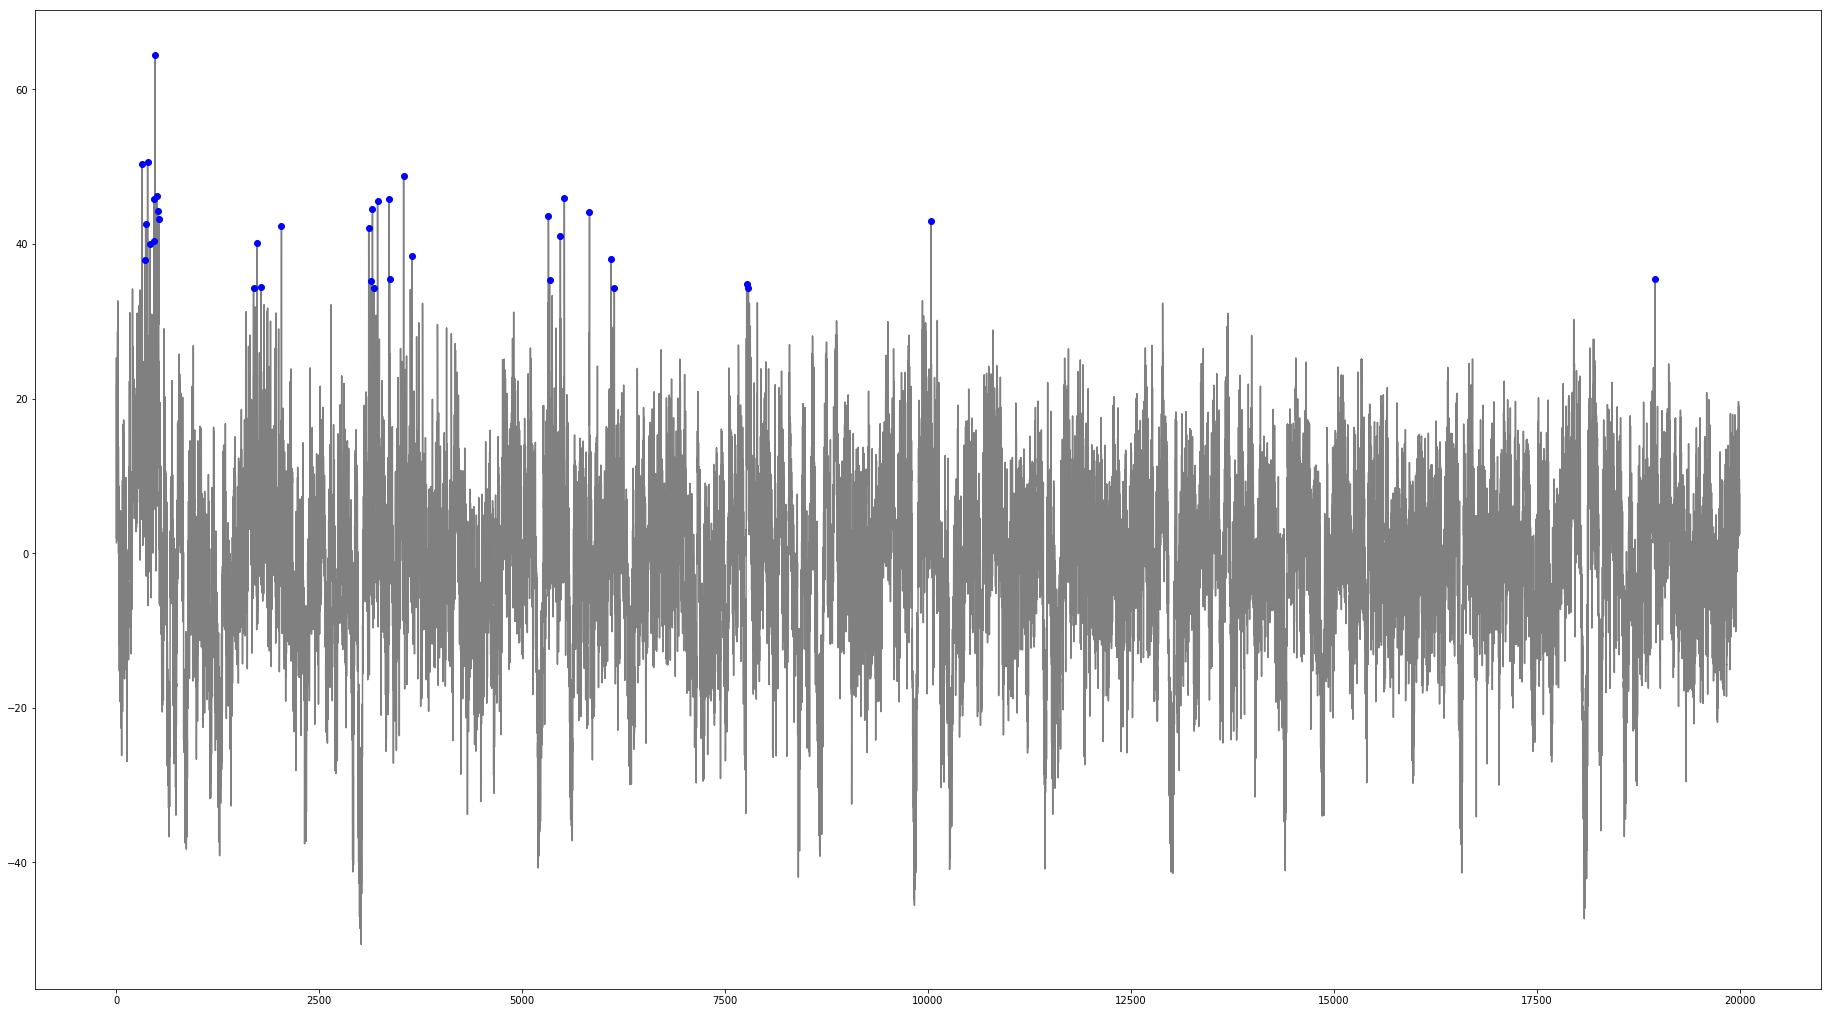

In [21]:
#Plot 5
plotPeaks(data[4])

In [22]:
def plotWaveform(array):
    #Plot the waveform of each peak
    peaks = getPeaks(array)
    peaks_idx = peaks[0]
    peaks_value = peaks[1]
    #initializes an array to calculate the average of each waveform
    average_array = np.ndarray(9, dtype = float)
    average_array.fill(0)
    for i in peaks_idx:
        x_values = range(i-4,i+5)
        y_values = []
        for j in x_values:
            y_values.append(array[j])
            average_array[j-i+4] = average_array[j-i+4] + array[j] #adds that value to the average array
        plt.plot(range(-4,5),y_values, color = 'gray', alpha = 0.7)
    #Plot the average waveform
    average_array = average_array / len(peaks_idx) #sum of values divided by number of peaks gives the average over all peaks
    plt.plot(range(-4,5), average_array, color = 'black', linewidth = 5)
    plt.show()    

#to improve on this method, I could calculate the median instead of the mean(using a 2d array and the median function) to
#reduce outlier bias.  Also, I could use scipy.signal.find_peaks to find the peaks more efficiently than manually calculating
#them as is done here

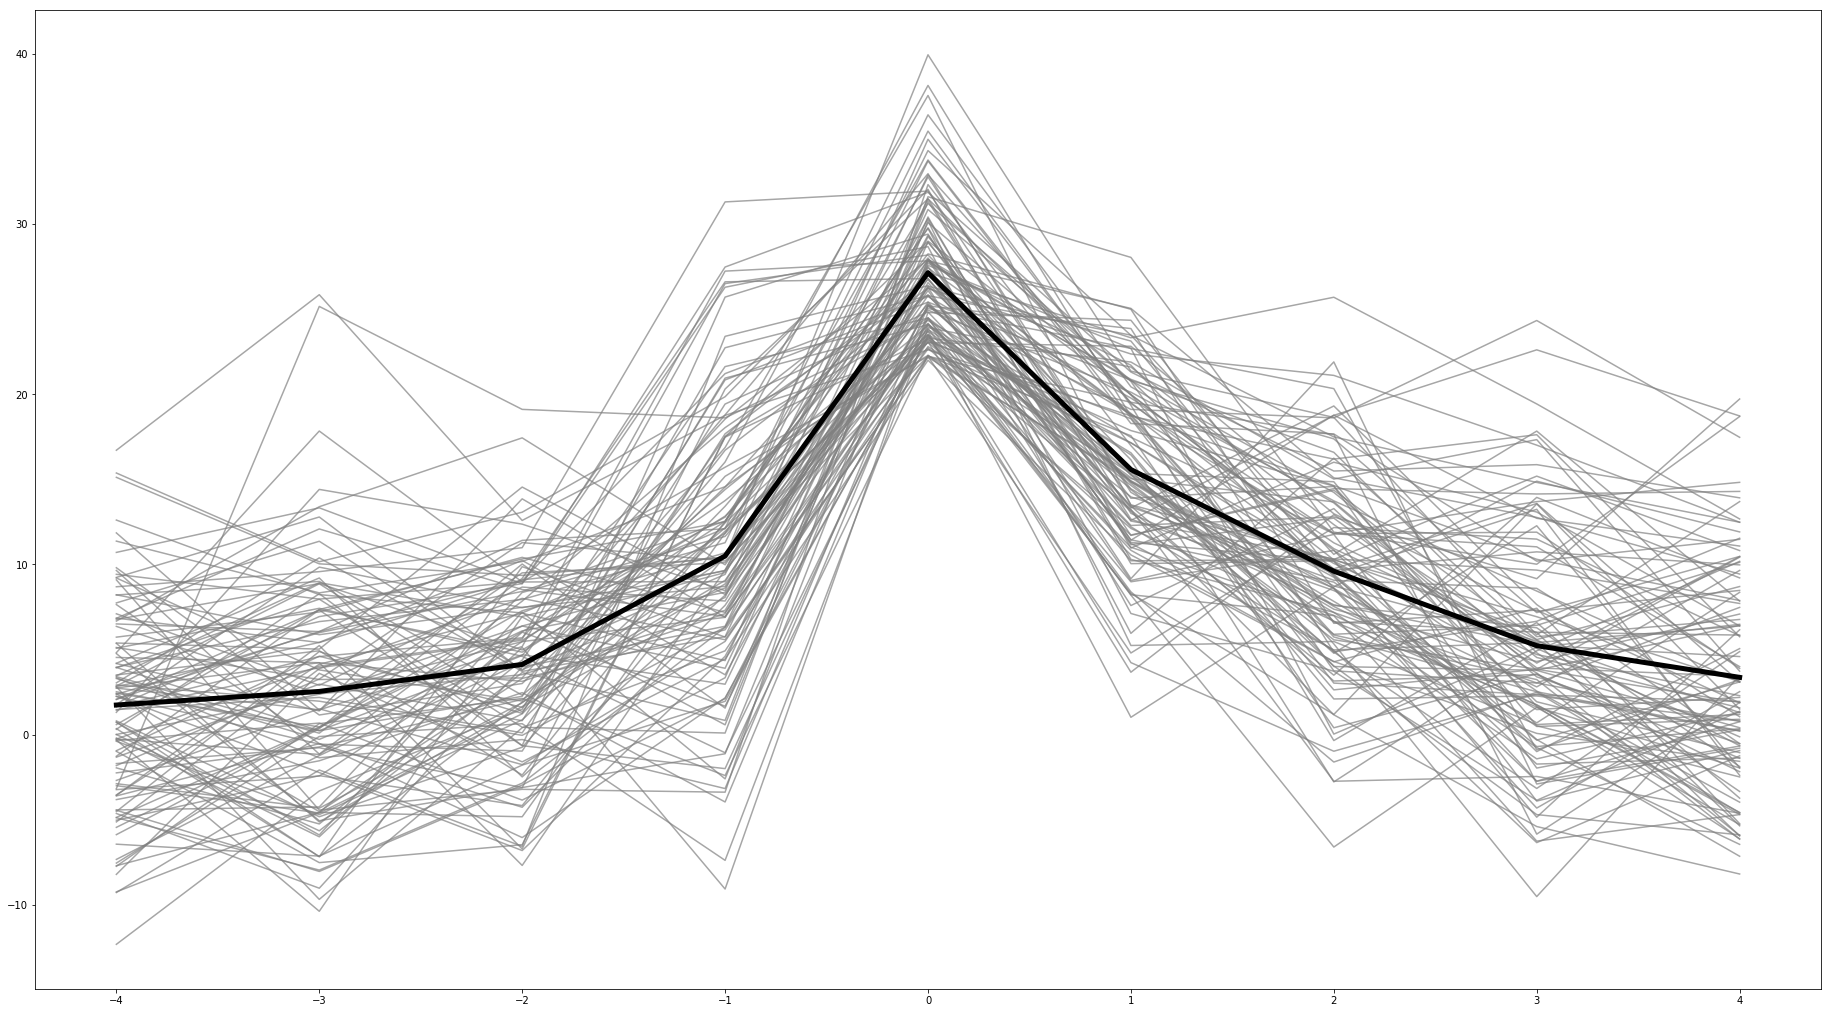

In [23]:
#Waveform Plot 1
plotWaveform(data[0])

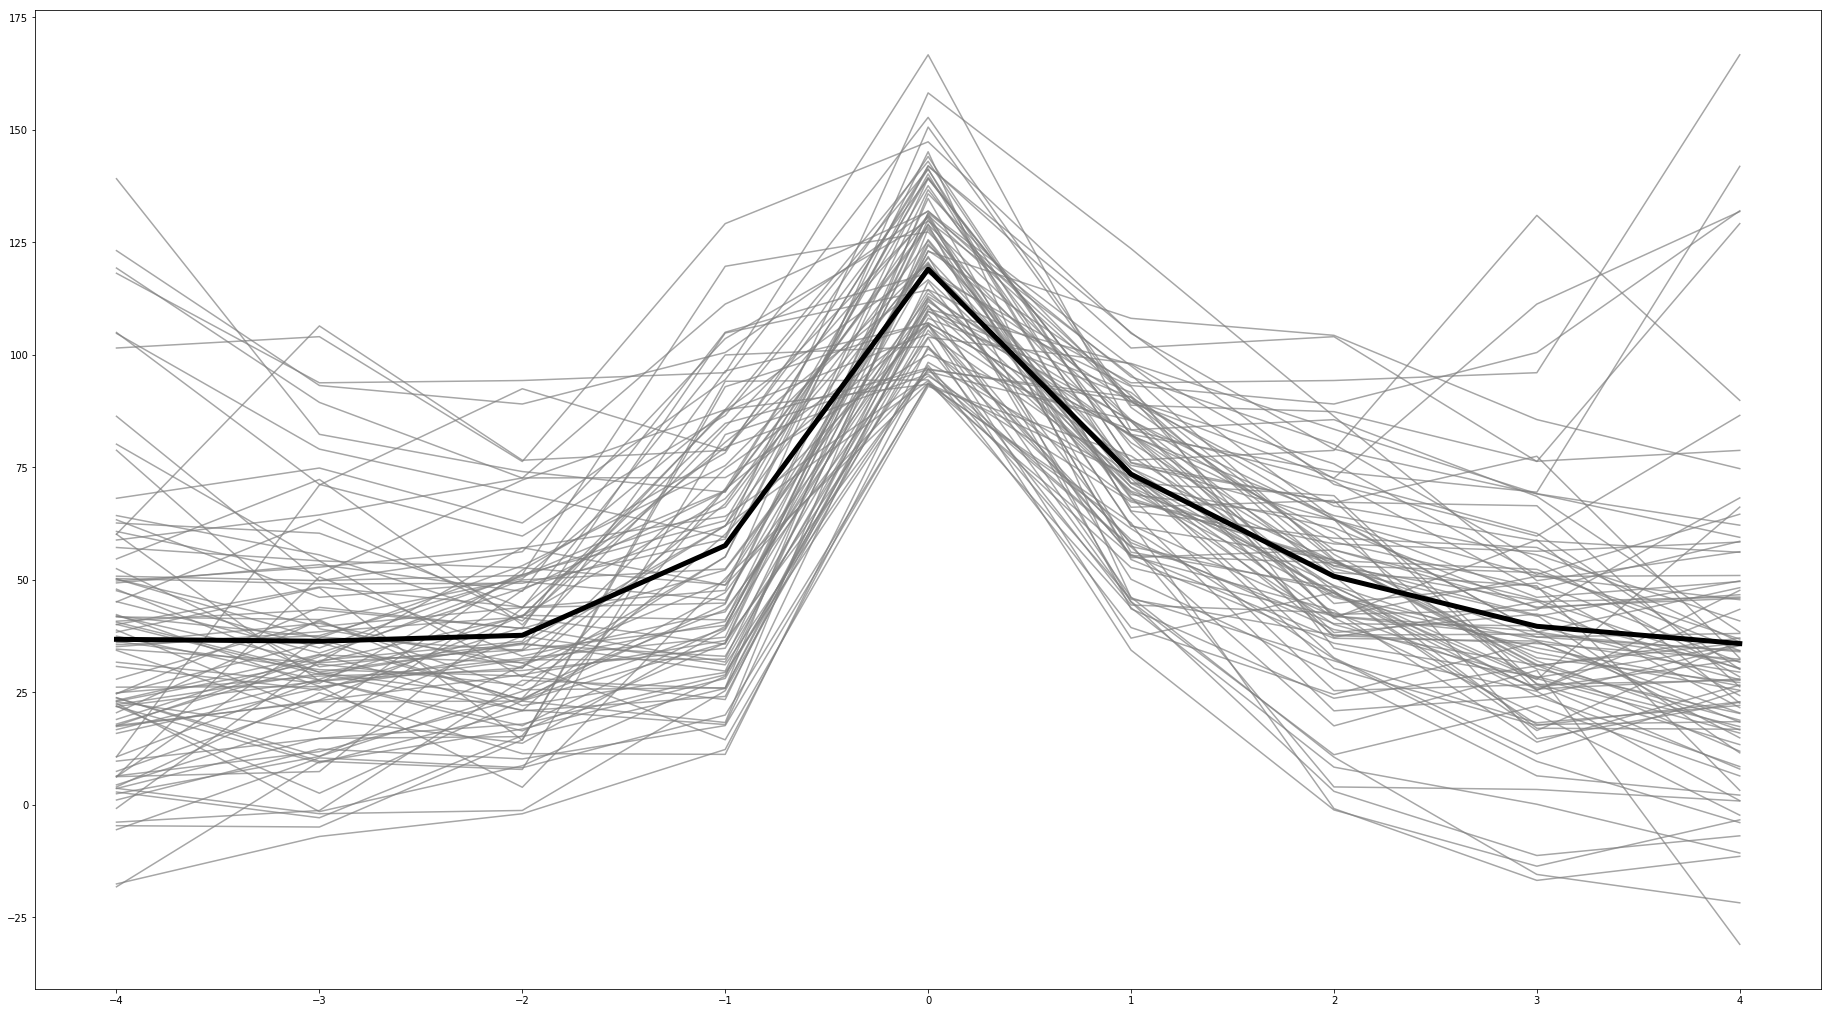

In [24]:
#Waveform Plot 2
plotWaveform(data[1])

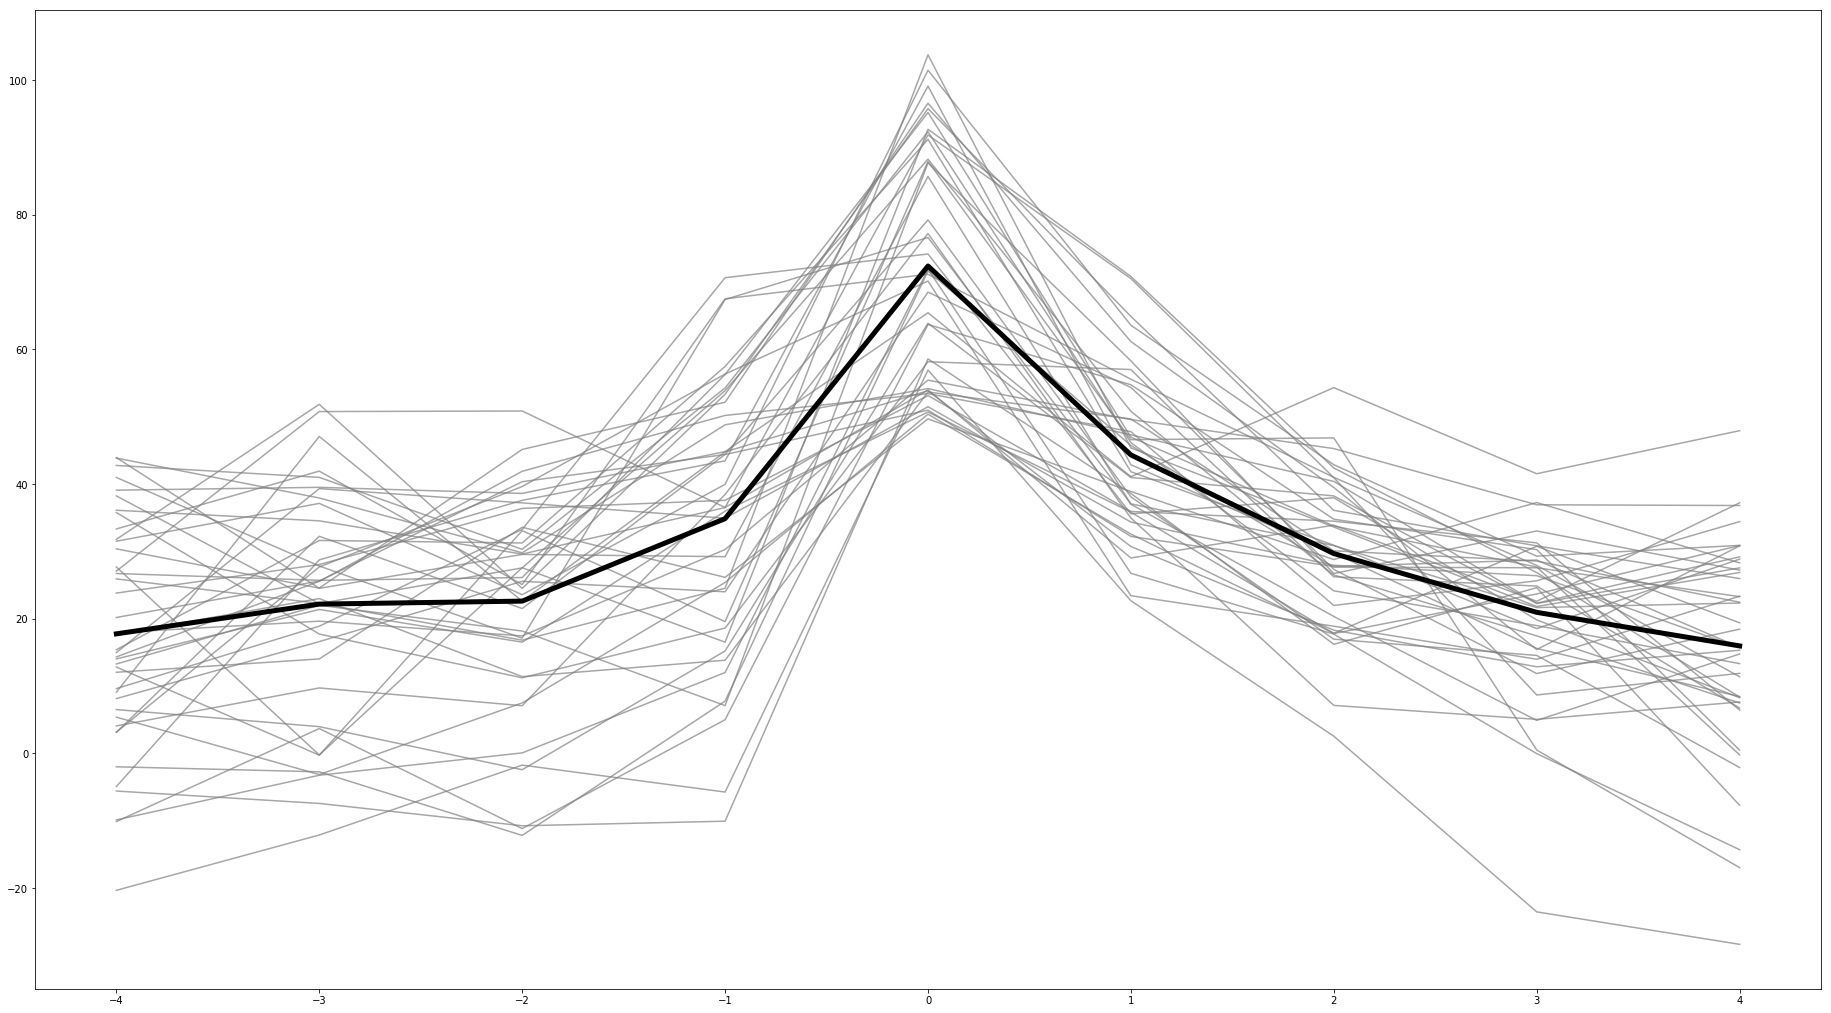

In [25]:
#Waveform Plot 3
plotWaveform(data[2])

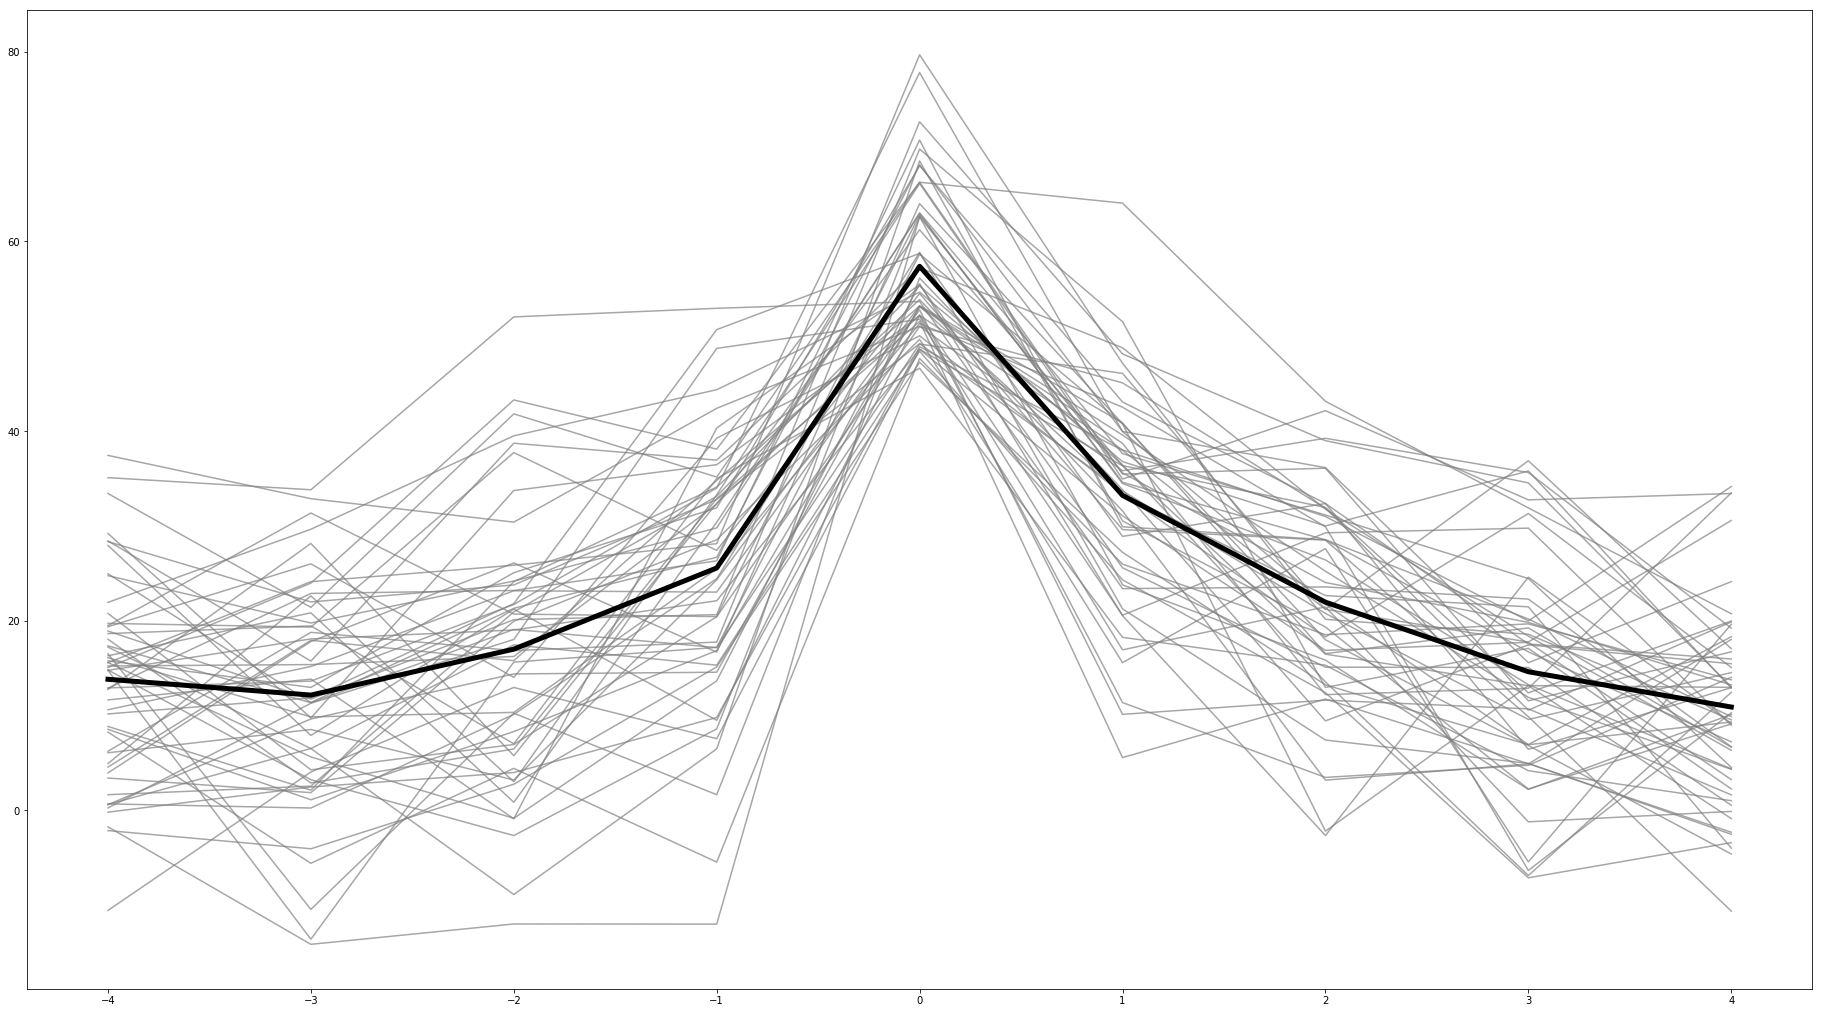

In [26]:
#Waveform Plot 4
plotWaveform(data[3])

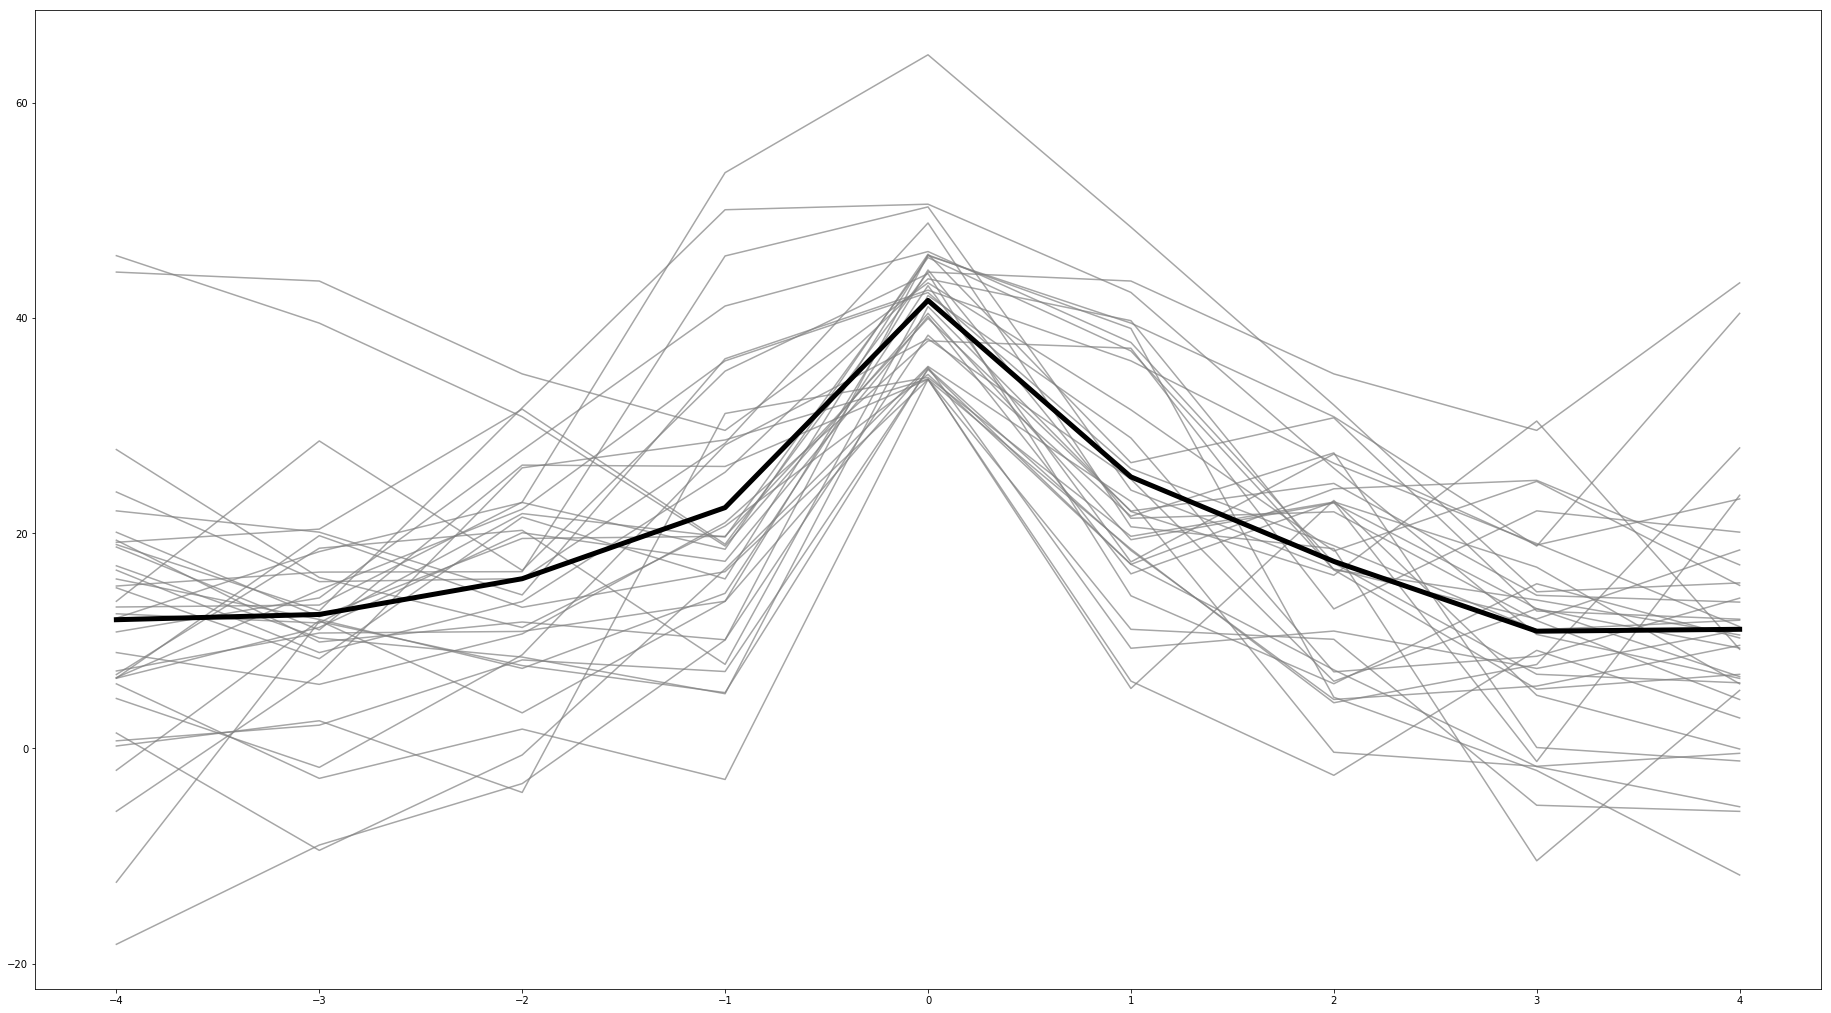

In [27]:
#Waveform Plot 5
plotWaveform(data[4])